# ANNs - Artificial Neural Networks

Below is the basic architecture of perceptron

We perform weighted sum with the inputs by assigning weights to each input, and multiplying with those weights, and taking the sum of individual products, resulting in a scalar summation value. This is the element-wise multiplication along with summation, which is exactly what a **dot product** does.

So the perceptron operation is as follows:  
Input values ${X = [x_1, x_2, \cdots, x_n]}$ along with assigned weights $ W = [w_1, w_2, \cdots, w_n]$ will result in a scalar output $y$ which is the result of the dot product $y = X^TW$. This is a linear operation (only addition and scalar multiplication, evverything else is non-linear).

Linear models solve linear problems using linear operations.  
Non-linear models solve complex problems.  
Linear model shouldn't be used to solve a non-linear problem and vice versa.

A perceptron has a linear operation whose result gets passed to a non-linear operation.

$$ \hat{y} = \sigma(X^TW)$$
Where $\hat{y}$ is the output of the perceptron function and $\sigma()$ is a non-linear function/operation that is performed on $y = X^TW$.  
Another part of a perceptron is a unit known as "bias" term, also known as intercept. It allows the classification/seperation line or hyper planes to not go always only through the origin. This gives us a better classification model as the line/plane is not constrained to pass only through origin, hence avoiding suboptimal models. Bias term is not always necessary.  
In the equation $y = mx + b$, $b$ is the bias term.

In the below equation, sometimes we assign the bias term as 1, and the equation becomes: $\hat{y} = \sigma(X^TW+w_0)$

We can also include $W_0$ in $W$ and $b$ as $x_0$ in $X$, making the whole term as $\hat{y} = X^TW$ with ${X = [x_0, x_1, x_2, \cdots, x_n]}$ along with assigned weights $ W = [w_0, w_1, w_2, \cdots, w_n]$

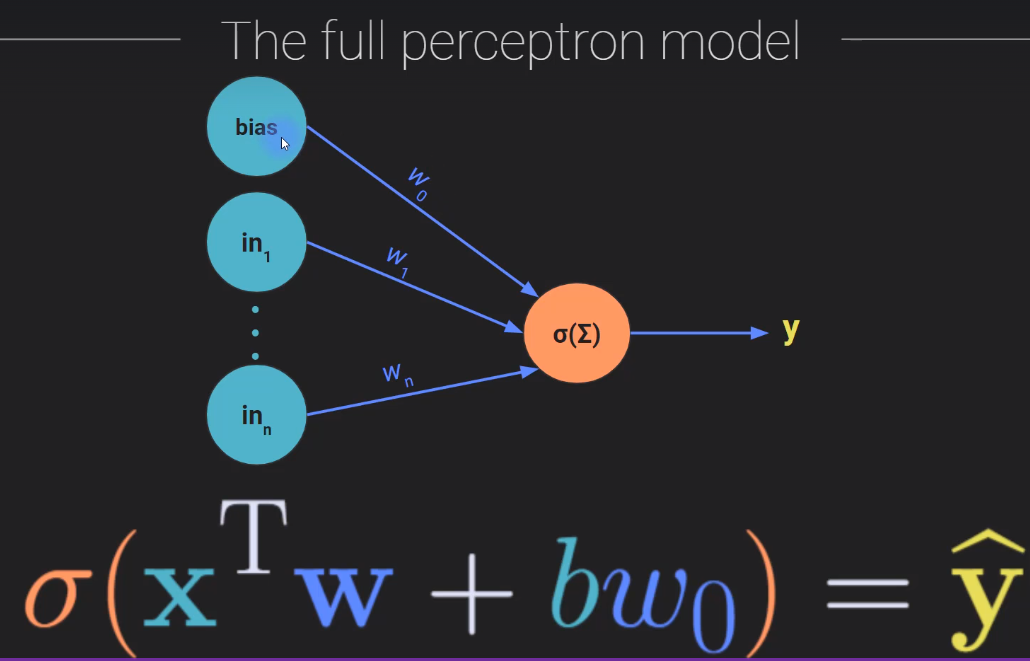

The whole perceptron model is known as **neuron/node/Unit**.

**Feature Space** - A geometric representation of data where each feature is an axis/dimension, and each observation (a row in a dataset, where each value in row corresponds to each feature) is a coordinate.

**Seperating hyperplane** - The boundary that classifies/binarizes/categorizes the data. Also known as Decision Boundary. In 2D, this hyperplane is just a line. For example, any point that falls above the line is classified as positive, and anything below the line is classified as negative. Hence the name decision boundary.

**Categories of model output:**
- **Discrete/categorical/binary/boolean** - eg: pass/fail, text sentiment (positive/negative), Race (White/black/asian)
- **Numerical/Continuous** - eg: Grade of an exam, Language translation, Attractiveness

**Activation Function** - It is a part of the perceptron that takes the output of linear model as input, and maps (more like produces a final output) it to the final output as output of perceptron. Most common activation functions are **Sigmoid, Hyperbolic Tangent and ReLU**. Many other activation functions are variances of these three.

**In the neural network model, each node is internally computing a dot product operation. The output of that operation is passed through an activation function that is performing a non-linear operation. The output of that operation is the final ouput of that node, which is going to be an input to the next node in the model.**

In the linear equation $\hat{y} = w_0x_0 + w_1x_1 + \cdots + w_nx_n$, there is a decision boundary/ hyperplane that can be drawn for the equation. Any point above the equation is classified as +ve and below is classified as -ve, and the boundary is formed on $\hat{y} = 0$.   
Once the activation function is used on the equation output, the final result of activation function is going to be between 0 to 1, with the boundary line being on $\hat{y} = 0.5$.  
Hence the activation function doesn't change the line. It just changes the extremities of the values possible. And since it is between 0-1, the output of the node is seen as probabilities, i.e. values above $\hat{y} = 0.5$ are classified as +ve and below 0.5 are classified as -ve.

So, the main part of classification model is to pick the right weights. This is where the point of "learning from data" comes in.

**In practice, $\hat{y}$ is seen as model prediction, and $y$ is seen as the ground truth/target from real world. Goal is to match $\hat{y}$ as close as possible to $y$**

The difference between the predicted and actual values is called an "error" which has to be quantified to make the model use it to learn better.

Basic mathematical interpretation of error can be seen as the difference $E = y - \hat{y}$ which can be positive or negative. This error is numerical and hence known as continuous error, which is signed and sensitive.

Errors can also be binarized (by putting a threshold, say 0.5). Errors < $\pm$0.5 can be seen as 0 and > than that can be seen as 1. There are easier to interpret but less sensitive and are unsigned. There are known as binarized errors. These errors are used to generate **loss functions**.

There are two main loss functions, others are variants of these two:
- Mean squared error - Used for continuous data when the model's output is a numerical prediction. (eg: Height, price, temperature).   
    Formula is: $$L = \frac{1}{2}(y - \hat{y})^2$$
- Cross Entropy (logistic) - Used for categorical data when the model output is a probability. (eg: Disease prediction, animal in picture, text sentiment etc.).  
    Formula: $$L = -(y\log(\hat{y}) + (1-y)\log(1-\hat{y}))$$
    
**Cost Function** - Average of loss function over N samples.  
Formula: $$J = \frac{1}{n}\sum^n_{i=1}L(y_i,\hat{y}_i)$$
This function is used as an optimisation criterion in training. Goal of DL is to find the right weights to minimize the cost function. $$W = \arg\min_WJ$$

**Why train on cost and not on loss?**  
Training on individual losses can be time consuming and can lead to overlfitting. However, training over averages of **too many/ all** losses can lead to descrease in sensitivity. So, optimal solution is to train the model into **batches** of samples.

![Perceptron%20to%20Network.png](attachment:Perceptron%20to%20Network.png "Perceptron to Deep Network" )

Again, each node is having inputs coming in, processed by a dotproduct operation, and fed to activation function that produces the output for that node:
$$What\  each\ node\  is/has\ => \sigma(X^TW) $$


Each unit/node in the network is a perceptron by itself (represented by white circle). **Each node in the network is independent of other nodes.** Each unit takes input, processes it and produces output that is forwarded to other nodes. **This means that we need to adjust the weights of these nodes independently**
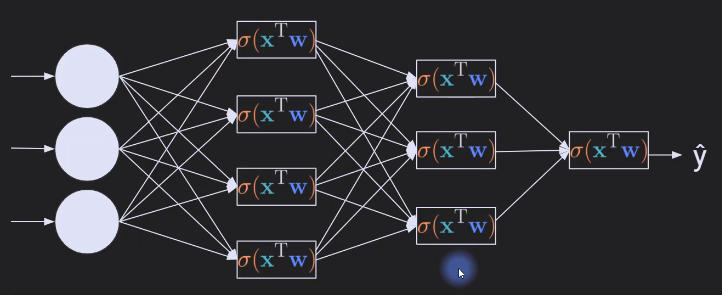

When the error is calculated (from $y$ and $\hat{y}$), it needs to propogate backwards through the network to reach all the other nodes. This learning pocess has to be done individually for each node.

This learning is done by adjusting the weights as per the error: $$ W = W - \eta\partial L$$
Where $\eta$ - learning rate, $\partial$ - partial derivative, and L - Loss function, which implies $\partial L$ is gradient of Loss function w.r.t weights W.  
$$\partial L = \frac{\partial L(\hat{y}, y)}{\partial W} = \frac{\partial L(\sigma(X^TW), y)}{\partial W}$$

We know that $$L = \frac{1}{2}(y - \hat{y})^2 = \frac{1}{2}(\sigma(X^TW) - y)^2$$
Let's call $ u = (\sigma(X^TW) - y)$, so $$ \frac{\partial L(u)}{\partial W} = \frac{\partial L(u)}{\partial u}.\frac{\partial u}{\partial W} = \frac{\partial L(u)}{\partial u}.\frac{\partial (\sigma(X^TW) - y)}{\partial W}$$

This is the fundamental princple of backpropogation. Here, Loss function L can also be substituted with cost function J

## ANN for regression

Simple regression - predicting one continuous variable from another:
$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i $$
Where $\beta_0, \ \beta_1, \ \epsilon_i$ are slope, intercept and residual error respectively for $i^{th}$ data value $y_i$. We predict $y$ values based on $x$. $\epsilon_i$ implies that the predictions are not very perfect.

We will build a sample regression model for the following architecture:

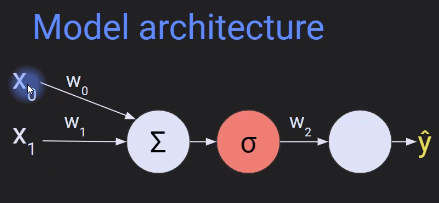


**(There will also be a bias term as input along with activation function o/p in the last perceptron circle).**
**Note - This is not a linear regression model. There will be non-linearity in the model**


Since we have continuously predicted mean square values, the loss function used is **MSE**.

Following is implemented using Pytorch:

In [2]:
# importing modules
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_9756/2379494020.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# creating data
N = 30 # 30 values
x = torch.randn(N,1)
x

tensor([[ 0.3081],
        [-0.9200],
        [ 0.5914],
        [ 0.8059],
        [ 0.3000],
        [ 1.0987],
        [ 1.1202],
        [ 0.1448],
        [ 1.0833],
        [-2.4582],
        [ 1.6536],
        [-2.1798],
        [ 0.5036],
        [ 0.8001],
        [ 0.2130],
        [ 1.8747],
        [-0.4880],
        [ 0.8121],
        [-0.2297],
        [-1.6881],
        [ 0.4048],
        [-0.1691],
        [ 0.7791],
        [ 0.8917],
        [ 0.2530],
        [ 0.6592],
        [-0.4004],
        [ 0.5923],
        [ 0.3239],
        [-0.1034]])

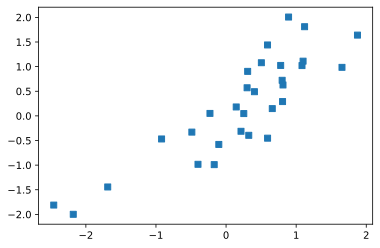

In [3]:
y = x + torch.randn(N,1)/2 # generating ground truth as well

plt.plot(x,y,'s')
plt.show()

Below model indicates that input layer takes in 1 feature as input [Linear(1,1)] , and give 1 output feature [Linear(1,1)]. By default, the bias term is set to true

In [4]:
# build the model
ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(),      #activation function
    nn.Linear(1,1)  #output layer
)
ANNreg

# setting up metaparameters

# learning rate
lr = 0.05

# loss function
lossfn = nn.MSELoss()

#optimizer - flavour of gradient descent to implement
opt = torch.optim.SGD(ANNreg.parameters(), lr=lr) # SGD - Stochastic Gradient Descent

# training the model

n = 500 # number of epochs
losses = torch.zeros(n)

for i in range(n):
    
    # forward pass
    yHat = ANNreg(x)  # yHat -> final prediction of the model
    
    # compute losses
    loss = lossfn(yHat,y) # this is the MSE used between yHat and y
    losses[i] = loss
    
    # backprop
    opt.zero_grad()
    loss.backward() # this implements backprop algo 
    opt.step()


Below computation is to run the model again and calculate MSE manually unlike using lossfn above

In [5]:
# manually compute the losses

# final forward pass
predictions = ANNreg(x)

# manual loss computation
testloss = (predictions - y).pow(2).mean() # manually doing MSE
testloss

tensor(0.2639, grad_fn=<MeanBackward0>)

Below plot shows the losses computed using ANN in blue color, and final test loss (which is going to be accurate as it is done manually) in red color

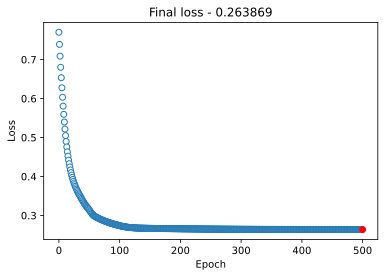

In [6]:
plt.plot(losses.detach(), 'o', markerfacecolor='w',linewidth=.1)
plt.plot(n,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss - %g' %testloss.item())
plt.show()

Correlation coefficient (covariance matrix) between y and $\hat{y}$ determines the accuracy

In [7]:
np.corrcoef(y.T,predictions.detach().T)

array([[1.        , 0.86311034],
       [0.86311034, 1.        ]])

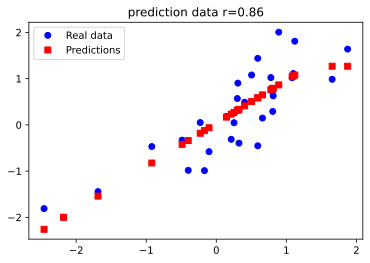

In [8]:
# plotting the model 

plt.plot(x,y,'bo', label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}') #correlation coefficient
plt.legend()
plt.show()

In [9]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

In [10]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?

# turns = np.array([i for i in range(5,50,2)]) #number of data points, ranging from 5 to 100


def ANN(N,div):
    x = torch.randn(N,1)
    y = x + torch.randn(N,1)/div # generating ground truth as well
    
    # build the model
    ANNreg = nn.Sequential(
        nn.Linear(1,1), #input layer
        nn.ReLU(),      #activation function
        nn.Linear(1,1)  #output layer
    )
    ANNreg

    # setting up metaparameters

    # learning rate
    lr = 0.05

    # loss function
    lossfn = nn.MSELoss()

    #optimizer - flavour of gradient descent to implement
    opt = torch.optim.SGD(ANNreg.parameters(), lr=lr) # SGD - Stochastic Gradient Descent

    # training the model

    n = 50 # number of epochs
    losses = torch.zeros(n)

    for i in range(n):

        # forward pass
        yHat = ANNreg(x) 

        # compute losses
        loss = lossfn(yHat,y) # this is the MSE used between yHat and y
        losses[i] = loss

        # backprop
        opt.zero_grad()
        loss.backward()
        opt.step()

    # manually compute the losses

    #final forward pass
    predictions = ANNreg(x)

    #final loss
    testloss = (predictions - y).pow(2).mean() #manually doing MSE

    return losses.detach(), testloss.detach()  #returning final loss


#count = 0

# for i in l:
#     if i > 0.25:
#         count += 1
        
# print(count)

In [11]:
l = []
qty = np.linspace(5,1000,200, dtype = 'int32') # number of data points
div = np.linspace(1,10,10, dtype = 'int32') # division of N for ques 2 for changing the noise level
#print(div)

for i in qty:
    k = []
    for j in div:
        k.append(ANN(i,j)[1]) # k contains loss at noise level
    l.append(k) # each element l contains loss at 10 noise levels for a particular quantity of data

These graphs below indicate the loss vs data quantity at each noise level for Ques 1 and 2

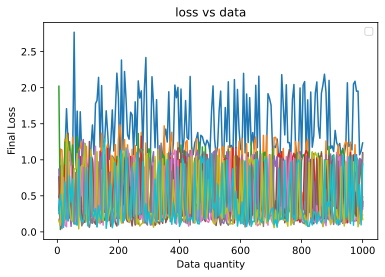

In [12]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
arr = np.array(l)
for i in range(arr.shape[1]): # for each noise level
    plt.plot(qty, arr[:,i], label="noise done /{}".format(i+1))
plt.title('loss vs data')
plt.xlabel('Data quantity')
plt.ylabel('Final Loss')
plt.legend([])
plt.show()
#list(range(5,1001,5))

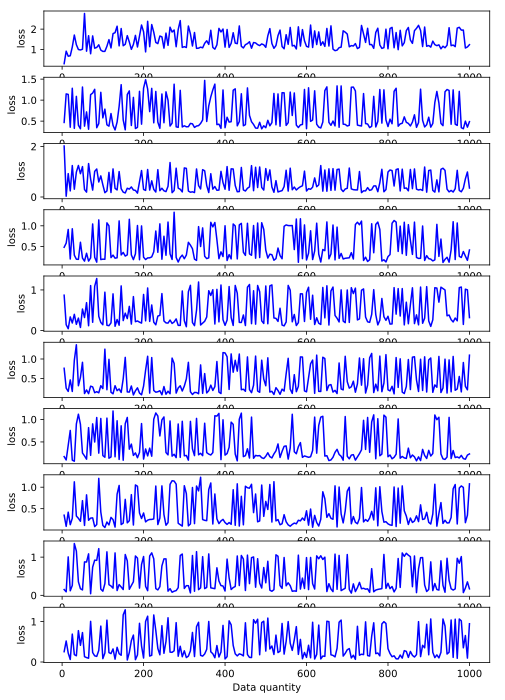

In [13]:
# create subplots for each column of arr
fig, axs = plt.subplots(10, 1, figsize=(8, 12))

for i in range(10):
    axs[i].plot(qty, arr[:, i], color='b', label="noise done /{}".format(i+1))
    axs[i].set_ylabel('loss')

# set common x-axis label
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Data quantity')

plt.show()

In [14]:
#3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

def ANN(N=30,div=2):
    x = torch.randn(N,1)
    y = x + torch.randn(N,1)/div # generating ground truth as well
    
    # build the model
    ANNreg = nn.Sequential(
        nn.Linear(1,1), #input layer
        nn.ReLU(),      #activation function
        nn.Linear(1,1)  #output layer
    )
    ANNreg

    # setting up metaparameters

    # learning rate
    lr = 0.05

    # loss function
    lossfn = nn.MSELoss()

    #optimizer - flavour of gradient descent to implement
    opt = torch.optim.SGD(ANNreg.parameters(), lr=lr) # SGD - Stochastic Gradient Descent

    # training the model

    n = 50 # number of epochs
    losses = torch.zeros(n)

    for i in range(n):

        # forward pass
        yHat = ANNreg(x) 

        # compute losses
        loss = lossfn(yHat,y) # this is the MSE used between yHat and y
        losses[i] = loss

        # backprop
        opt.zero_grad()
        loss.backward()
        opt.step()

    # manually compute the losses

    #final forward pass
    predictions = ANNreg(x)

    #final loss
    testloss = (predictions - y).pow(2).mean() #manually doing MSE

    return testloss.detach()  #returning final loss


count = 0

l = []

for i in range(100):
    l.append(ANN())
    
for i in l:
    if i > 0.25:
        count += 1
        
print(count)

96


# ANN for binary classification


Loss function used will be __Binary Cross-entropy__. Two input features will be given.

Model Architecture:  

__Linear -> ReLu -> Linear -> Sigmoid__

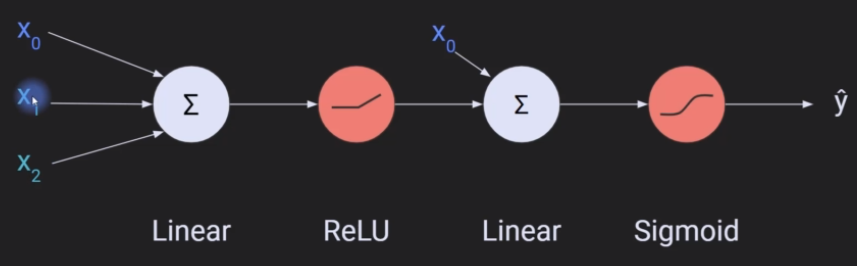

- Sigmoid restricts output range b/w 0-1. Value of op > 0.5 => class 1, < 0.5 => class 0.
- It prevents errors from being too large
- In multiclass classification, op value of sigmoid can be used as probability

## Creating Data

In [3]:
# Creating Data

npc = 100 # 100 points per cluster 
blur = 1  # standard dev. to spread out the data

A = [1, 1]   # Centers of clusters
B = [5, 1]

# Generating data
a = [A[0] + np.random.randn(npc)*blur, A[1] + np.random.randn(npc)*blur]
b = [B[0] + np.random.randn(npc)*blur, B[1] + np.random.randn(npc)*blur]

# True labels
labels = np.vstack((np.zeros((npc, 1)), np.ones((npc, 1))))

# Concatenating into a matrix
data = np.hstack((a,b)).T

# convert to tensor
labels = torch.tensor(labels).float()
data = torch.tensor(data).float()

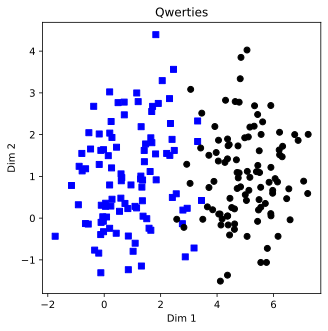

In [4]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('Qwerties')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

In [5]:
# Model
ANN = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

# other model features

lr = 0.05    # learning rate
lossfn = nn.BCELoss()    # loss function
optim = torch.optim.SGD(ANN.parameters(), lr=lr)         # optimizer

__Note:__ Pytorch doesn't recomment adding __nn.sigmoid()__ explicitly as it can be calculated in other loss function, __nn.BCEWithLogitsLoss()__ as it will calculate sigmoid internally and is more numerically stable.

In [6]:
# Training loop

ne = 1000    # number of epochs
losses = torch.zeros(ne)

for i in range(ne):
    y_pred = ANN(data)   # forward pass

    loss = lossfn(y_pred, labels)    # compute losses
    losses[i] = loss
    
    optim.zero_grad()    # backprop
    loss.backward()
    optim.step()

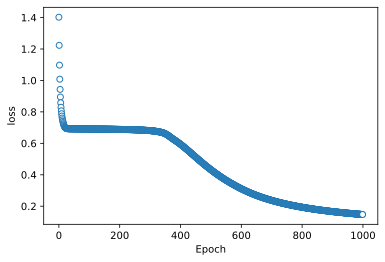

In [7]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

In [8]:
# final predictions after model has been trained
pred = ANN(data)

predLabels = pred > .5

misclassified = np.where(predLabels != labels)[0]

total_acc = 100 - 100*len(misclassified)/(2*npc)

print('Final accuracy:', total_acc)

Final accuracy: 95.0


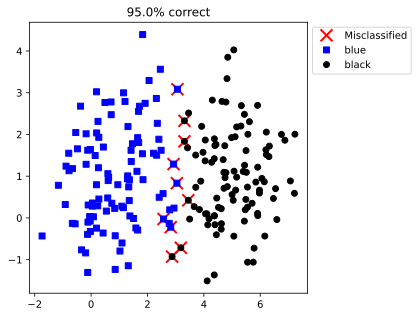

In [10]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0], data[misclassified, 1], 'rx', markersize=12, markeredgewidth=2)
plt.plot(data[np.where(~predLabels)[0], 0], data[np.where(~predLabels)[0], 1], 'bs')
plt.plot(data[np.where(predLabels)[0], 0], data[np.where(predLabels)[0], 1], 'ko')
plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor=(1,1))
plt.title(f'{total_acc}% correct')
plt.show()

## Learning Rates comparision

Divide the above code in two - creating ANN, Training ANN with learning rates as parameters. 

In [12]:
# Creating Data

npc = 100 # 100 points per cluster 
blur = 1  # standard dev. to spread out the data

A = [1, 1]   # Centers of clusters
B = [5, 1]

# Generating data
a = [A[0] + np.random.randn(npc)*blur, A[1] + np.random.randn(npc)*blur]
b = [B[0] + np.random.randn(npc)*blur, B[1] + np.random.randn(npc)*blur]

# True labels
labels = np.vstack((np.zeros((npc, 1)), np.ones((npc, 1))))

# Concatenating into a matrix
data = np.hstack((a,b)).T

# convert to tensor
labels = torch.tensor(labels).float()
data = torch.tensor(data).float()

In [18]:
def createANN(lr):
    ANN = nn.Sequential(
        nn.Linear(2,1),
        nn.ReLU(),
        nn.Linear(1,1),
    )

    lr = lr   # learning rate
    lossfn = nn.BCEWithLogitsLoss()    # loss function
    optim = torch.optim.SGD(ANN.parameters(), lr=lr)         # optimizer
    
    return ANN, lossfn, optim

In [25]:
def TrainANN(ANN, lossfn, optim, ne):

    ne = ne    # number of epochs
    losses = torch.zeros(ne)

    for i in range(ne):
        y_pred = ANN(data)   # forward pass

        loss = lossfn(y_pred, labels)    # compute losses
        losses[i] = loss

        optim.zero_grad()    # backprop
        loss.backward()
        optim.step()
    
    pred = ANN(data)

    total_acc = 100*torch.mean(((pred > 0) == labels).float())

    return losses, pred, total_acc


Final Accuracy: 99.0


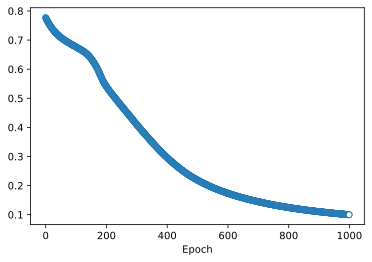

In [26]:
# Testing functionality

ANN, lossfn, optim = createANN(.05)
losses, pred, acc = TrainANN(ANN, lossfn, optim, 1000)

print(f'Final Accuracy: {acc}')

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.show()

### Experiment

In [31]:
lr = np.linspace(0.001, 0.1, 40)
epochs = 1000
lr

array([0.001     , 0.00353846, 0.00607692, 0.00861538, 0.01115385,
       0.01369231, 0.01623077, 0.01876923, 0.02130769, 0.02384615,
       0.02638462, 0.02892308, 0.03146154, 0.034     , 0.03653846,
       0.03907692, 0.04161538, 0.04415385, 0.04669231, 0.04923077,
       0.05176923, 0.05430769, 0.05684615, 0.05938462, 0.06192308,
       0.06446154, 0.067     , 0.06953846, 0.07207692, 0.07461538,
       0.07715385, 0.07969231, 0.08223077, 0.08476923, 0.08730769,
       0.08984615, 0.09238462, 0.09492308, 0.09746154, 0.1       ])

In [36]:
lr_acc = [] # accuracy by LR
all_loss = np.zeros((len(lr), epochs))

for i, lnr in enumerate(lr):
    ANN, lossfn, optim = createANN(lnr)
    losses, pred, acc = TrainANN(ANN, lossfn, optim, epochs)
    
    lr_acc.append(acc)
    all_loss[i, :] = losses.detach()  

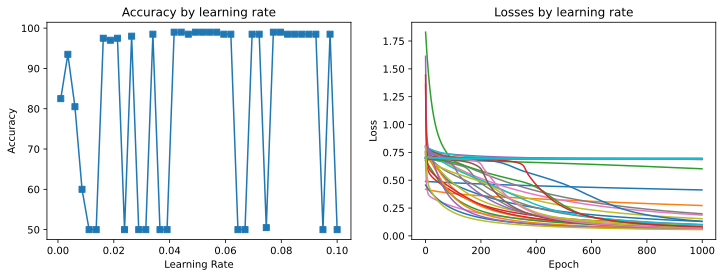

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(lr, lr_acc, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(all_loss.T)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learning rate')
plt.show()

In [38]:
sum(torch.tensor(lr_acc) > 70)/len(lr_acc)

tensor(0.6750)

In [ ]:
# Running the experiment 50 times
nExp = 50
meta_acc = np.zeros((nExp, len(lr)))

ne = 500 # epochs

for i in range(nExp):
    for j, lnr in enumerate(lr):
        
        ANN, lossfn, optim = createANN(lnr)
        losses, pred, acc = TrainANN(ANN, lossfn, optim, ne)
        
        meta_acc[i, j] = acc

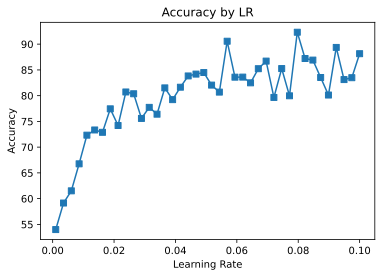

In [40]:
plt.plot(lr, np.mean(meta_acc, axis=0), 's-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by LR')
plt.show()